In [1]:
# # Importing all the csv's
# csv_files = [
#     ('customers.csv', 'customers'),
#     ('orders.csv', 'orders'),
#     ('sellers.csv', 'sellers'),
#     ('products.csv', 'products'),
#     ('geolocation.csv', 'geolocation'),
#     ('payments.csv', 'payments'),
#     ('order_items.csv', 'order_items') 
# ]

# # Setup SQL connection
# conn = mysql.connector.connect(
#     host='localhost',
#     user='root',
#     password='12345678',
#     database='ecommerce'
# )
# cursor = conn.cursor()

# # Folder containing the CSV files
# folder_path = '/Users/akhilsahu/Documents/Py Project/target/datasets'

# def get_sql_type(dtype):
#     if pd.api.types.is_integer_dtype(dtype):
#         return 'INT'
#     elif pd.api.types.is_float_dtype(dtype):
#         return 'FLOAT'
#     elif pd.api.types.is_bool_dtype(dtype):
#         return 'BOOLEAN'
#     elif pd.api.types.is_datetime64_any_dtype(dtype):
#         return 'DATETIME'
#     else:
#         return 'TEXT'

# for csv_file, table_name in csv_files:
#     file_path = os.path.join(folder_path, csv_file)
    
#     # Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Replace NaN with None to handle SQL NULL
#     df = df.where(pd.notnull(df), None)
    
#     # Debugging: Check for NaN values
#     print(f"Processing {csv_file}")
#     print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

#     # Clean column names
#     df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

#     # Generate the CREATE TABLE statement with appropriate data types
#     columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
#     create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
#     cursor.execute(create_table_query)

#     # Insert DataFrame data into the MySQL table
#     for _, row in df.iterrows():
#         # Convert row to tuple and handle NaN/None explicitly
#         values = tuple(None if pd.isna(x) else x for x in row)
#         sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
#         cursor.execute(sql, values)

#     # Commit the transaction for the current CSV file
#     conn.commit()

# # Close the connection
# conn.close()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns
import os
print("Done")

Done


In [3]:
# Initialising database
db = mysql.connector.connect(host = "localhost",
                           username = "root",
                           password = "12345678",
                           database = "ecommerce")

cur = db.cursor()

### List unique cities where customers are located

In [4]:
query = """ SELECT DISTINCT customer_city FROM customers """
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### Number of Order placed in 2017

In [5]:
query = """ SELECT count(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""
cur.execute(query)
data = cur.fetchall()
data[0][0]

45101

### Find the total sales per category

In [6]:
query = """ 
SELECT UPPER(pr.product_category) Category, ROUND(SUM(p.payment_value), 2) Sales
FROM products pr
LEFT JOIN order_items ot 
ON pr.product_id = ot.product_id
LEFT JOIN payments p 
ON ot.order_id = p.order_id
GROUP BY pr.product_category
ORDER BY Sales DESC, Category
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
...,...,...
69,PC GAMER,2174.43
70,HOUSE COMFORT 2,1710.54
71,CDS MUSIC DVDS,1199.43
72,FASHION CHILDREN'S CLOTHING,785.67


### Calculate the percentage of orders that were paid in installments

In [7]:
query = """
SELECT
    ((SELECT count(*)
    FROM payments
    WHERE payment_installments > 1)/COUNT(*))*100
FROM payments;
"""
cur.execute(query)
data = cur.fetchall()
print(f"{round(float(data[0][0]), 2)} %")

49.42 %


### Count the number of customers from each state

Text(0, 0.5, 'Customer Count')

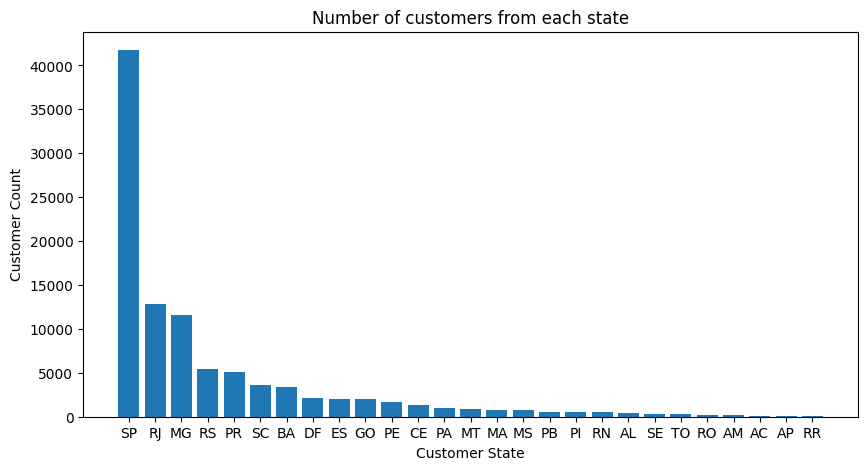

In [8]:
query = """
SELECT customer_state, COUNT(*) AS customers_count
FROM customers
GROUP BY customer_state
ORDER BY customers_count DESC;
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["customer_state", "customers_count"])

plt.figure(figsize = (10,5))
plt.bar(df["customer_state"], df["customers_count"])
plt.title("Number of customers from each state")
plt.xlabel("Customer State")
plt.ylabel("Customer Count")

### Calculate the number of orders per month in 2018

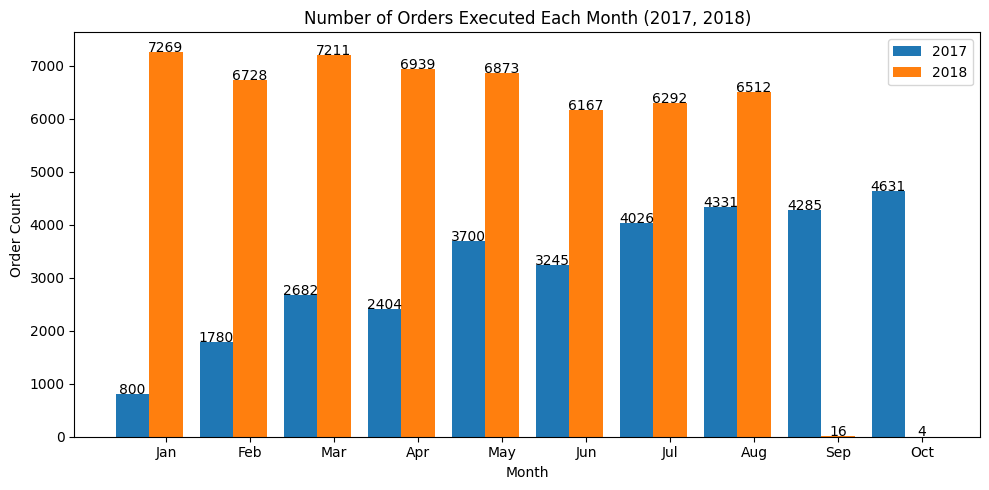

In [9]:
def plot_orders_for_years(cur, years):

    data_dict = {}

    for year in years:
        query = f"""
        SELECT DATE_FORMAT(order_purchase_timestamp, '%b') AS month, COUNT(*) AS orders_cnt
        FROM orders
        WHERE YEAR(order_purchase_timestamp) = {year}
        GROUP BY month, MONTH(order_purchase_timestamp)
        ORDER BY MONTH(order_purchase_timestamp);
        """
        cur.execute(query)
        data = cur.fetchall()

        data_dict[year] = pd.DataFrame(data, columns=["month", "orders_cnt"])

    df_merged = data_dict[years[0]]
    for year in years[1:]:
        df_merged = pd.merge(df_merged, data_dict[year], on="month", suffixes=(f'_{years[0]}', f'_{year}'))


    plt.figure(figsize=(10,5))
    width = 0.4 

    months = df_merged['month']
    x = np.arange(len(months))  


    for i, year in enumerate(years):
        plt.bar(x + (i - len(years)/2)*width, df_merged[f'orders_cnt_{year}'], width=width, label=str(year))

        # Add text annotations
        for j in range(len(df_merged)):
            plt.text(j + (i - len(years)/2)*width, df_merged[f'orders_cnt_{year}'][j] + 1, 
                     str(df_merged[f'orders_cnt_{year}'][j]), ha='center')


    plt.title(f"Number of Orders Executed Each Month ({', '.join(map(str, years))})")
    plt.xlabel("Month")
    plt.ylabel("Order Count")
    plt.xticks(x, months)  
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_orders_for_years(cur, [2017, 2018])


### Find the average number of products per order, grouped by customer city

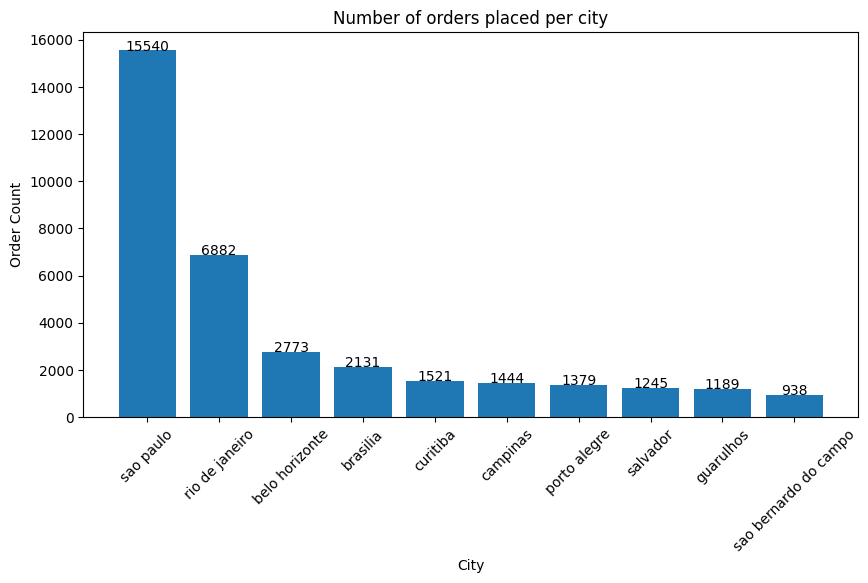

In [10]:
query = """
SELECT c.customer_city city, count(o.order_id) orders_cnt
FROM orders o
LEFT JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_city
ORDER BY count(o.order_id) DESC;
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["city", "orders_cnt"])


df_plt = df[0:10]

plt.figure(figsize = (10,5))
plt.bar(df_plt["city"], df_plt["orders_cnt"])
plt.title("Number of orders placed per city")
plt.xlabel("City")
plt.xticks(rotation = 45)
plt.ylabel("Order Count")


for i in range(len(df_plt["orders_cnt"])):
    plt.text(i, df_plt["orders_cnt"][i] + 1, str(df_plt["orders_cnt"][i]), ha='center')

### Find the average number of products per order, grouped by customer city.

In [11]:
query = """
WITH count_per_order AS
(SELECT o.order_id, o.customer_id, COUNT(ot.order_id) AS oc
 FROM orders o
 JOIN order_items ot
 ON o.order_id = ot.order_id
 GROUP BY o.order_id, o.customer_id)

SELECT c.customer_city, ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers c
JOIN count_per_order
ON c.customer_id = count_per_order.customer_id
GROUP BY c.customer_city
ORDER BY average_orders DESC;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer_city", "average products/order"])
df.head(10)

,customer_city,average products/order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,cidelandia,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,curralinho,4.00


### Calculate the percentage of total revenue contributed by each product category

In [12]:
query = """
SELECT UPPER(p.product_category) AS category,
ROUND((SUM(pay.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS sales_percentage
FROM products p
JOIN order_items ot
ON p.product_id = ot.product_id
JOIN payments pay
ON pay.order_id = ot.order_id
GROUP BY category
ORDER BY sales_percentage DESC;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["product_category", "sales_percentage"])
df.head(10)

,product_category,sales_percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


### Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
query = """
SELECT p.product_category,
COUNT(ot.product_id),
ROUND(AVG(ot.price), 2)
FROM products p
JOIN order_items ot
ON p.product_id = ot.product_id
GROUP BY p.product_category;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157562


### Calculate the total revenue generated by each seller, and rank them by revenue.

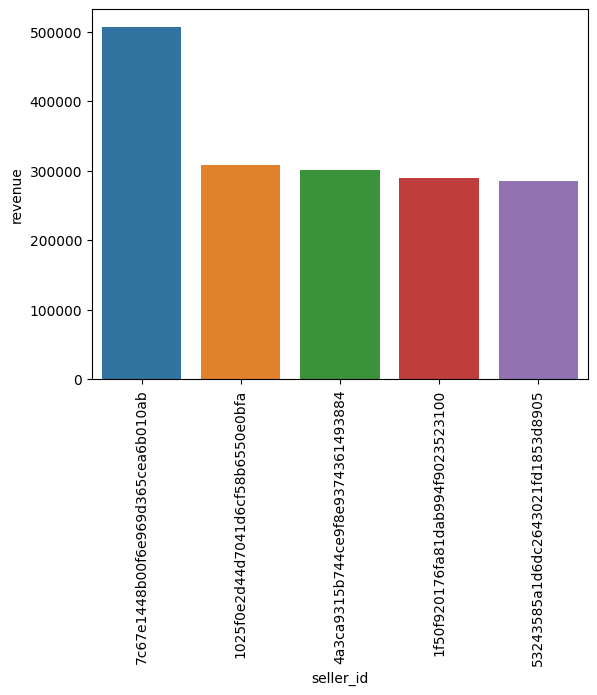

In [14]:
query = """
SELECT *, DENSE_RANK() OVER (ORDER BY revenue DESC) AS rn
FROM
(SELECT ot.seller_id, SUM(pay.payment_value) AS revenue
 FROM order_items ot JOIN payments pay
 ON ot.order_id = pay.order_id
 GROUP BY ot.seller_id) AS a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

### Calculate the moving average of order values for each customer over their order history.

In [15]:
query = """
SELECT customer_id, order_purchase_timestamp, payment,
AVG(payment) OVER (PARTITION BY customer_id ORDER BY order_purchase_timestamp
ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS mov_avg
FROM
(SELECT o.customer_id, o.order_purchase_timestamp, 
pay.payment_value AS payment
 FROM payments pay JOIN orders o
 ON pay.order_id = o.order_id) AS a;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer_id", "order_purchase_timestamp","payment","moving_avg"])
df

,customer_id,order_purchase_timestamp,payment,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


### Calculate the cumulative sales per month for each year.

In [16]:
query = """
SELECT years, months, payment, SUM(payment)
OVER (ORDER BY years, months) AS cumulative_sales
FROM 
(SELECT YEAR(o.order_purchase_timestamp) AS years,
 MONTH(o.order_purchase_timestamp) AS months,
 ROUND(SUM(pay.payment_value), 2) AS payment
 FROM orders o
 JOIN payments pay
 ON o.order_id = pay.order_id
 GROUP BY years, months
 ORDER BY years, months) AS a;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["years", "months","payment","cumulative_sales"])
df

,years,months,payment,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


### Calculate the year-over-year growth rate of total sales.

In [17]:
query = """
WITH a AS (SELECT YEAR(o.order_purchase_timestamp) AS years,
ROUND(SUM(pay.payment_value), 2) AS payment
FROM orders o
JOIN payments pay
ON o.order_id = pay.order_id
GROUP BY years
ORDER BY years)

SELECT years, ((payment - LAG(payment, 1) OVER (ORDER BY years)) /
LAG(payment, 1) OVER (ORDER BY years)) * 100
FROM a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


### Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [18]:
query = """
WITH a AS (
    SELECT c.customer_id,MIN(o.order_purchase_timestamp) AS first_order
    FROM customers AS c
    JOIN orders AS o
    ON c.customer_id = o.customer_id
    GROUP BY c.customer_id
),
b AS (
    SELECT a.customer_id, COUNT(DISTINCT o.order_purchase_timestamp) AS next_order
    FROM a 
    JOIN orders AS o
        ON o.customer_id = a.customer_id
        AND o.order_purchase_timestamp > first_order
        AND o.order_purchase_timestamp < DATE_ADD(first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
) 
SELECT 100 * (COUNT(DISTINCT a.customer_id) / COUNT(DISTINCT b.customer_id)) 
FROM a 
LEFT JOIN b 
ON a.customer_id = b.customer_id;
"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

### Identify the top 3 customers who spent the most money in each year.

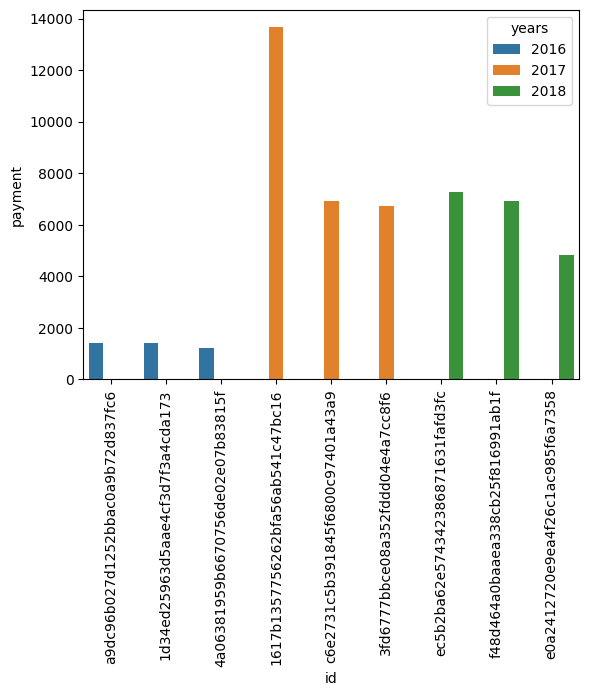

In [19]:
query = """
SELECT years, customer_id, payment, d_rank
FROM (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS years,
        o.customer_id,
        SUM(pay.payment_value) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(o.order_purchase_timestamp)
            ORDER BY SUM(pay.payment_value) DESC
        ) AS d_rank
    FROM orders AS o
    JOIN payments AS pay
    ON pay.order_id = o.order_id
    GROUP BY YEAR(o.order_purchase_timestamp), o.customer_id
) AS a
WHERE d_rank <= 3;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()